In [1]:
import torch as T
import torchvision.models as models
import torchvision.transforms as transforms

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
class Extractor(T.nn.Module):
    def __init__(self):
        super().__init__()
        
        res = models.resnet152(pretrained=True)
        self.res = T.nn.Sequential(*list(res.children())[:-1])
    
    def forward(self, img):
        
        out = self.res(img)
        
        return out

model = Extractor().cuda()

In [3]:
trs = transforms.Compose([transforms.Resize((224, 224)), 
                          transforms.ToTensor(), 
                          transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                                               std=[0.229, 0.224, 0.225])])

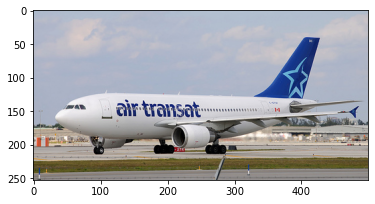

torch.Size([1, 2048])


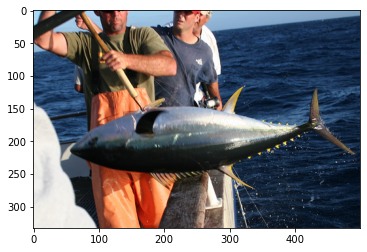

torch.Size([1, 2048])


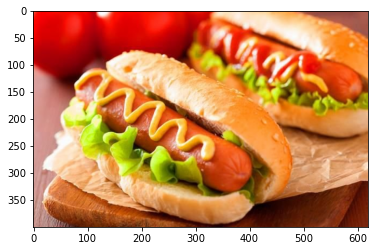

torch.Size([1, 2048])


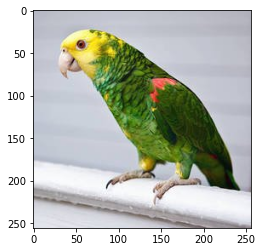

torch.Size([1, 2048])


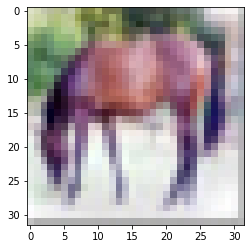

torch.Size([1, 2048])


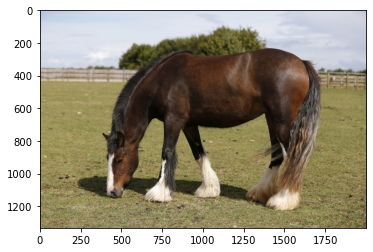

torch.Size([1, 2048])


In [4]:
def run_model(img):
    inp = trs(img)
    
    inp = inp.unsqueeze(0) # (3, 224, 224) -> (1, 3, 224, 224)
    
    out = model(inp.cuda())
    out = out.squeeze(2) # (1, 2048, 1, 1) -> (1, 2048, 1)
    out = out.squeeze(2) # (1, 2048, 1) -> (1, 2048)
    
    return out

for i in range(1, 7):
    img = Image.open('%d.jpg'%(i))
    
    plt.figure()
    plt.imshow(img)
    plt.show()
    
    feature = run_model(img)
    print(feature.shape)